In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("techwave_sales.csv")
df=df.drop(['Customer_ID','Order_ID'],axis=1)
df

,Order_Date,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method
0,2024-10-16,Male,Accessories,Bluetooth Speaker,1,115.87,115.87,Ismailia,Credit Card
1,2023-04-25,Female,Mobile,Galaxy Z,1,669.28,669.28,Tanta,COD
2,2023-01-26,Female,Mobile,iSmart S,3,303.87,911.61,Giza,COD
3,2025-01-29,Male,Accessories,NoiseCancel Headphones,2,100.92,201.84,Cairo,COD
4,2023-10-09,Male,Accessories,Wireless Charger,2,27.82,55.64,Ismailia,PayPal
...,...,...,...,...,...,...,...,...,...
198,2023-04-28,Female,Laptop,GamingPro 15,1,1264.58,1264.58,Tanta,Bank Transfer
199,2024-11-29,Female,Mobile,iSmart S,1,912.65,912.65,Aswan,Bank Transfer
200,2024-09-10,Male,Accessories,Bluetooth Speaker,1,126.43,126.43,Giza,Bank Transfer
201,2025-04-05,Male,Wearable,FitWatch X,1,292.88,292.88,Cairo,Credit Card


In [3]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [4]:
df.isna().sum() #number of nan

Order_Date          0
Gender              0
Product_Category    0
Product_Name        0
Quantity            0
Price               1
Total_Sales         0
City                1
Payment_Method      1
dtype: int64

In [5]:
df.duplicated().sum()
df[df.duplicated()]

,Order_Date,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method
200,2024-09-10,Male,Accessories,Bluetooth Speaker,1,126.43,126.43,Giza,Bank Transfer
201,2025-04-05,Male,Wearable,FitWatch X,1,292.88,292.88,Cairo,Credit Card
202,2024-08-26,Female,Accessories,Bluetooth Speaker,2,81.57,163.14,Tanta,Credit Card


In [6]:
df=df.dropna()
df=df.drop_duplicates()
df

,Order_Date,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method
0,2024-10-16,Male,Accessories,Bluetooth Speaker,1,115.87,115.87,Ismailia,Credit Card
1,2023-04-25,Female,Mobile,Galaxy Z,1,669.28,669.28,Tanta,COD
2,2023-01-26,Female,Mobile,iSmart S,3,303.87,911.61,Giza,COD
3,2025-01-29,Male,Accessories,NoiseCancel Headphones,2,100.92,201.84,Cairo,COD
4,2023-10-09,Male,Accessories,Wireless Charger,2,27.82,55.64,Ismailia,PayPal
...,...,...,...,...,...,...,...,...,...
195,2023-01-12,Male,Accessories,Wireless Charger,2,75.99,151.98,Tanta,Credit Card
196,2024-11-27,Female,Mobile,iSmart S,1,766.58,766.58,Mansoura,COD
197,2025-01-08,Female,Mobile,PixelOne 6,1,438.40,438.40,Hurghada,Credit Card
198,2023-04-28,Female,Laptop,GamingPro 15,1,1264.58,1264.58,Tanta,Bank Transfer


In [7]:
df['Product_Name'].unique()

array(['Bluetooth Speaker', 'Galaxy Z', 'iSmart S',
       'NoiseCancel Headphones', 'Wireless Charger', 'NoteTab 10',
       'TabPro 11', 'UltraBook X14', 'WorkMate 13', 'PixelOne 6',
       'FitWatch X', 'GamingPro 15', 'HealthBand 2'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Date        197 non-null    datetime64[ns]
 1   Gender            197 non-null    object        
 2   Product_Category  197 non-null    object        
 3   Product_Name      197 non-null    object        
 4   Quantity          197 non-null    int64         
 5   Price             197 non-null    float64       
 6   Total_Sales       197 non-null    float64       
 7   City              197 non-null    object        
 8   Payment_Method    197 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 15.4+ KB


Text(0.5, 1.0, 'sales on each city')

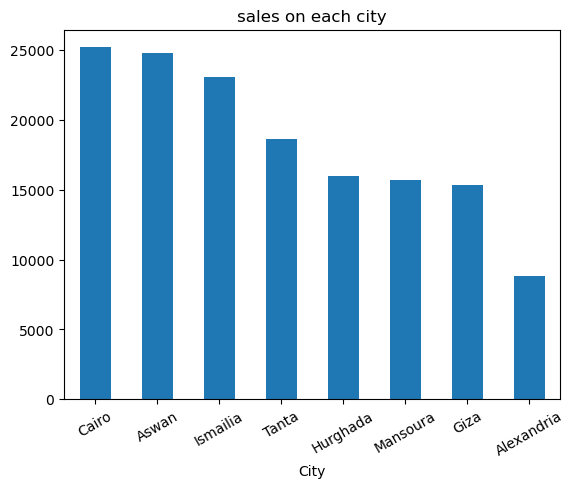

In [58]:
df.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30)
plt.show
plt.title('sales on each city')

Text(0.5, 1.0, 'top categories')

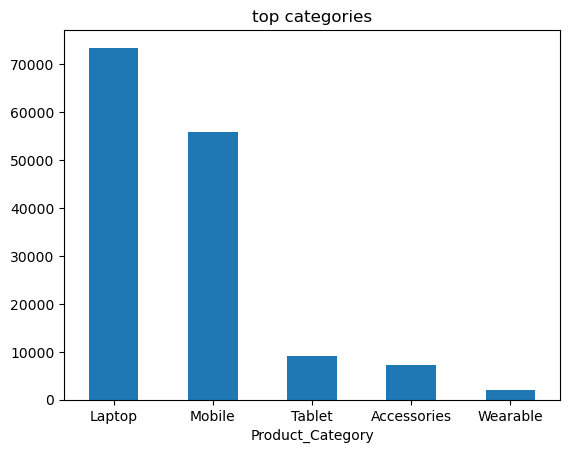

In [59]:
df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show
plt.title('top categories')

Text(0.5, 1.0, 'top five sellers')

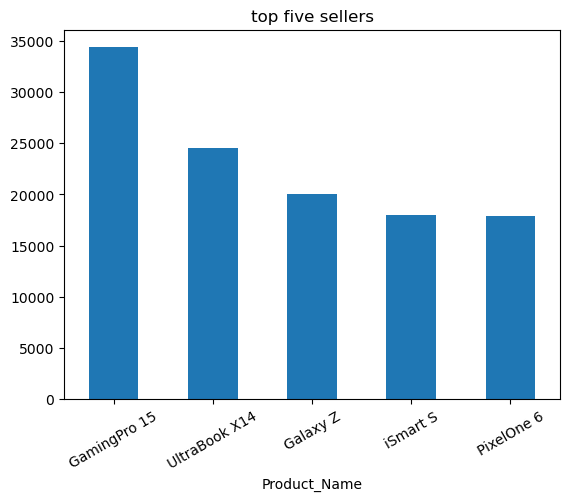

In [60]:
df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head().plot(kind='bar')
plt.xticks(rotation=30)
plt.show
plt.title('top five sellers')

Text(0.5, 1.0, 'which gender buy more')

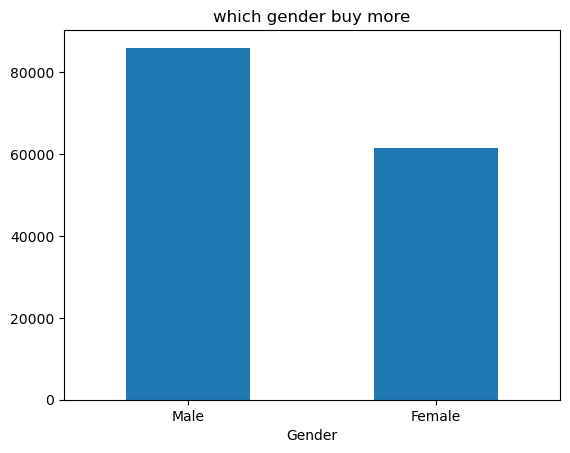

In [61]:
df.groupby('Gender')['Total_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show
plt.title('which gender buy more')

In [18]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card      96
COD              39
PayPal           37
Bank Transfer    25
Name: count, dtype: int64

In [19]:
df.groupby('Payment_Method')['Total_Sales'].agg(['sum','mean']).sort_values(by='sum',ascending=False)

,sum,mean
Payment_Method,,
Credit Card,74380.34,774.795208
PayPal,30027.65,811.558108
COD,29800.37,764.112051
Bank Transfer,13309.09,532.363600


Text(0.5, 1.0, 'most preferred payment method')

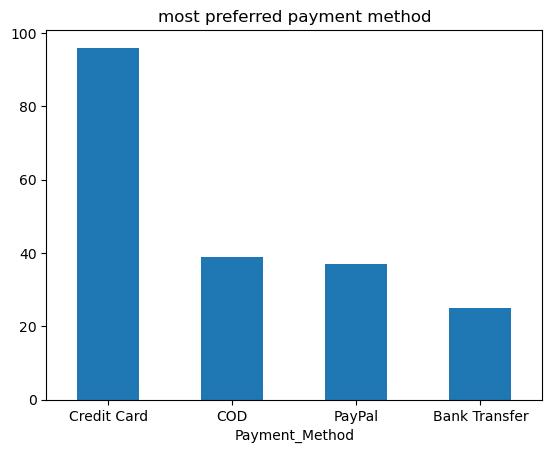

In [62]:
df['Payment_Method'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show
plt.title('most preferred payment method')

In [31]:
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year

Text(0.5, 1.0, 'most profitable months')

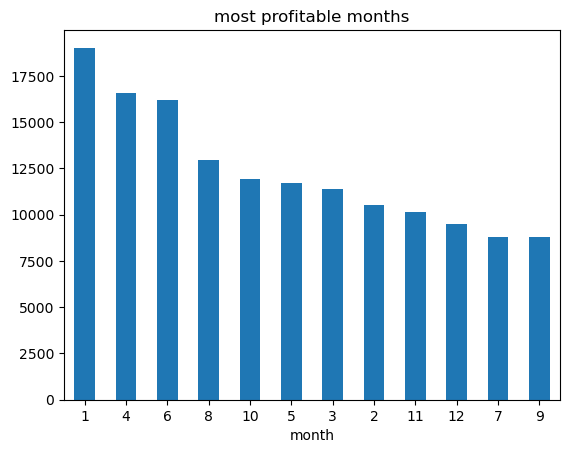

In [64]:
df.groupby('month')['Total_Sales'].agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show
plt.title('most profitable months')

Text(0.5, 1.0, 'highest revenue years')

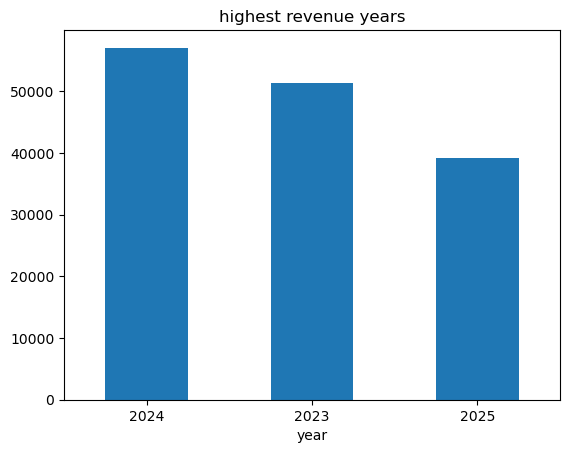

In [65]:
df.groupby('year')['Total_Sales'].agg('sum').sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show
plt.title('highest revenue years')

In [37]:
#add a new city sales column


city_sales=(df.groupby('City')['Total_Sales'].sum() / df['Total_Sales'].sum()) * 100
df['city_sales']=df['City'].map(city_sales)
df.head(10)

,Order_Date,Gender,Product_Category,Product_Name,Quantity,Price,Total_Sales,City,Payment_Method,month,year,city_sales
0,2024-10-16,Male,Accessories,Bluetooth Speaker,1,115.87,115.87,Ismailia,Credit Card,10,2024,15.639824
1,2023-04-25,Female,Mobile,Galaxy Z,1,669.28,669.28,Tanta,COD,4,2023,12.634668
2,2023-01-26,Female,Mobile,iSmart S,3,303.87,911.61,Giza,COD,1,2023,10.406633
3,2025-01-29,Male,Accessories,NoiseCancel Headphones,2,100.92,201.84,Cairo,COD,1,2025,17.062856
4,2023-10-09,Male,Accessories,Wireless Charger,2,27.82,55.64,Ismailia,PayPal,10,2023,15.639824
6,2023-08-17,Male,Tablet,NoteTab 10,1,362.21,362.21,Aswan,COD,8,2023,16.806751
7,2023-05-23,Female,Accessories,Bluetooth Speaker,3,82.80,248.40,Ismailia,Credit Card,5,2023,15.639824
8,2025-01-24,Female,Tablet,TabPro 11,3,698.37,2095.11,Tanta,PayPal,1,2025,12.634668
9,2023-04-15,Female,Accessories,NoiseCancel Headphones,2,57.35,114.70,Aswan,Credit Card,4,2023,16.806751
10,2024-11-23,Male,Accessories,Bluetooth Speaker,1,188.90,188.90,Giza,Credit Card,11,2024,10.406633
